In [20]:
import pandas as pd

DATA_DIR = "./dados"
csv_entrada = f"{DATA_DIR}/SIH_2019_com_CID_KEY.csv"
csv_saida = f"{DATA_DIR}/SIH_2019_filtrado.csv"

# Ler o CSV consolidado
df = pd.read_csv(csv_entrada)

print(f"Total de registros: {len(df)}")

/tmp/ipykernel_13622/1131844811.py:8: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_entrada)


Total de registros: 771568


In [21]:
codigos_cid_dialise = ['N180', 'N181', 'N182', 'N183', 'N184', 'N185', 'N186', 'N188', 'N189']
df_filtrado = df[df['CID_10_KEY'].isin(codigos_cid_dialise)]


/tmp/ipykernel_13622/1819070187.py:8: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(arquivo_csv)


Total de registros no CSV: 771568
Total de internações de residentes em Porto Alegre: 104630
Total de internações por diálise em Porto Alegre: 973


/tmp/ipykernel_13622/1819070187.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dialise['ANO_MES'] = df_dialise['ANO_CMPT'].astype(str) + '-' + df_dialise['MES_CMPT'].astype(str).str.zfill(2)


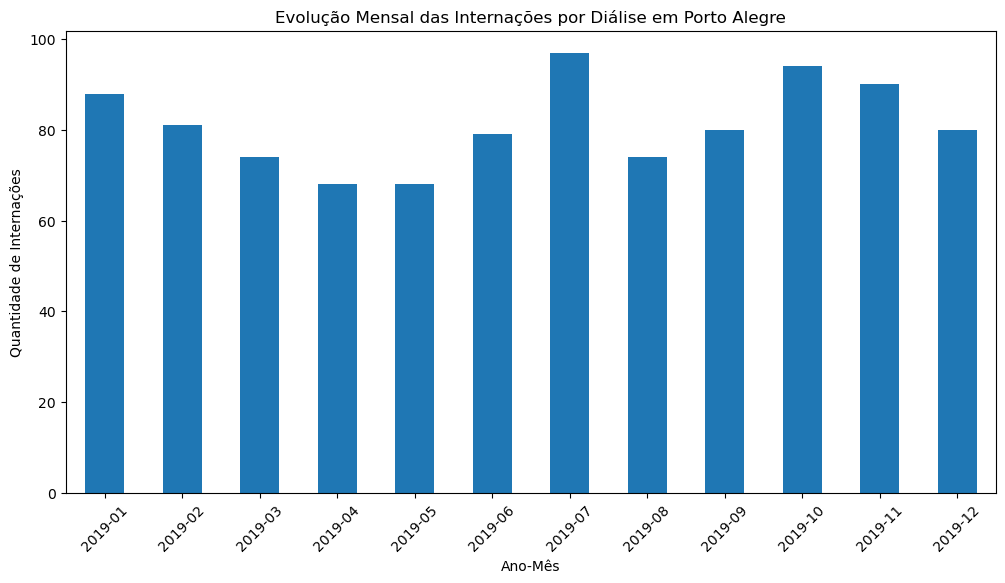

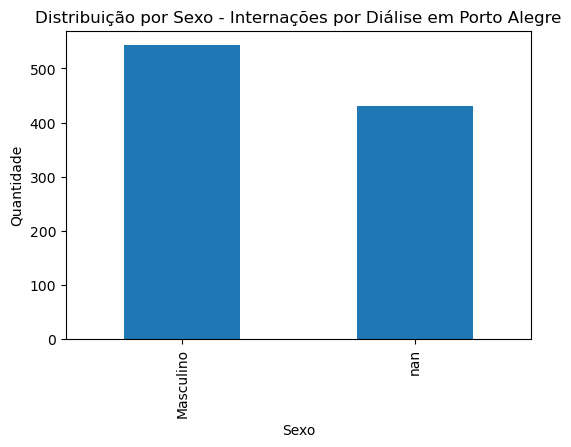

/tmp/ipykernel_13622/1819070187.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dialise['FAIXA_ETARIA'] = pd.cut(df_dialise['IDADE'], bins=bins, labels=labels, right=False)


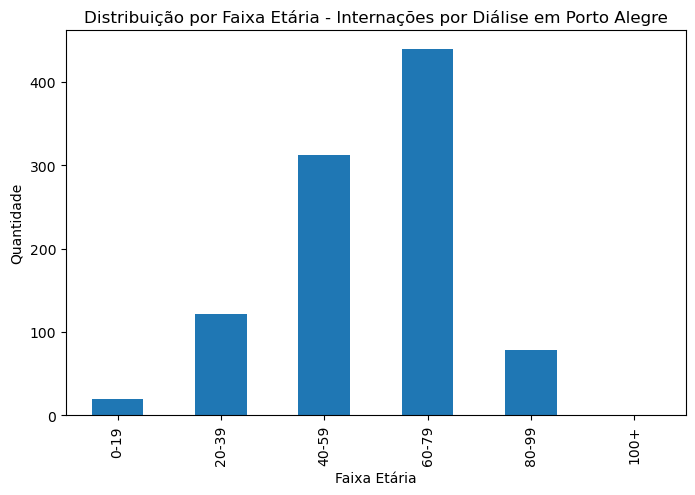

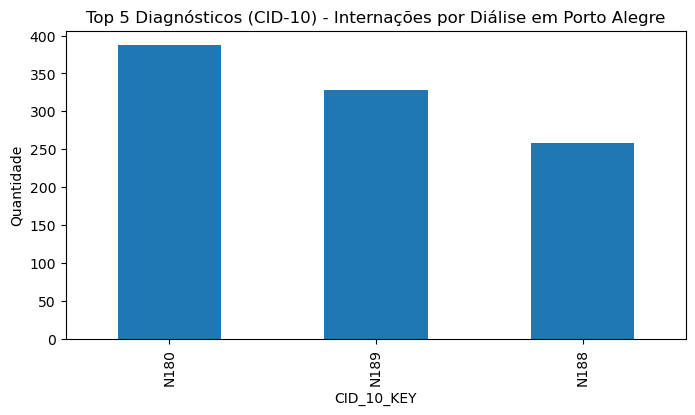

/tmp/ipykernel_13622/1819070187.py:86: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_diarias = df_dialise.groupby('FAIXA_ETARIA')['QT_DIARIAS'].mean()


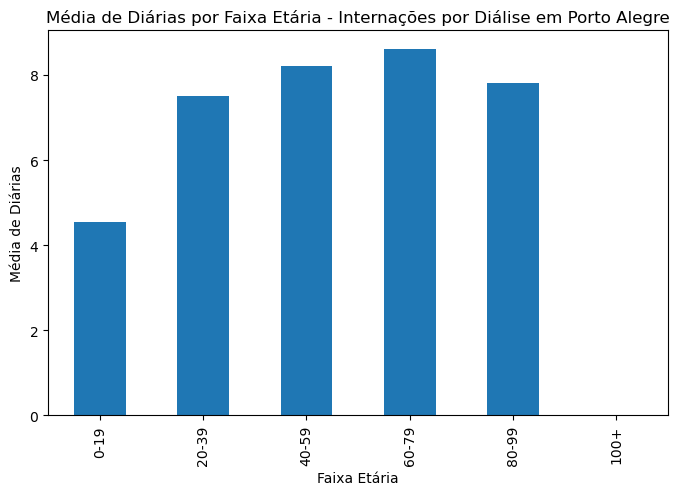

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

DATA_DIR = "./dados"
arquivo_csv = f"{DATA_DIR}/SIH_2019_com_CID_KEY.csv"

# ✅ Ler o CSV consolidado
df = pd.read_csv(arquivo_csv)

print(f"Total de registros no CSV: {len(df)}")

# ✅ Filtro atualizado para Porto Alegre (código 431490 no seu dataset)
df_poars = df[df['MUNIC_RES'] == 431490]
print(f"Total de internações de residentes em Porto Alegre: {len(df_poars)}")

# ✅ Foco nos códigos CID-10 de doença renal crônica / diálise
codigos_cid_dialise = ['N180', 'N181', 'N182', 'N183', 'N184', 'N185', 'N186', 'N188', 'N189']

df_dialise = df_poars[df_poars['CID_10_KEY'].isin(codigos_cid_dialise)]
print(f"Total de internações por diálise em Porto Alegre: {len(df_dialise)}")

# 📊 1. Evolução mensal das internações
if 'ANO_CMPT' in df_dialise.columns and 'MES_CMPT' in df_dialise.columns:
    df_dialise['ANO_MES'] = df_dialise['ANO_CMPT'].astype(str) + '-' + df_dialise['MES_CMPT'].astype(str).str.zfill(2)
    mes_counts = df_dialise['ANO_MES'].value_counts().sort_index()
    if not mes_counts.empty:
        plt.figure(figsize=(12,6))
        mes_counts.plot(kind='bar')
        plt.title('Evolução Mensal das Internações por Diálise em Porto Alegre')
        plt.xlabel('Ano-Mês')
        plt.ylabel('Quantidade de Internações')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("⚠️ Nenhum dado para evolução mensal.")

# 📊 2. Distribuição por sexo
if 'SEXO' in df_dialise.columns:
    sexo_counts = df_dialise['SEXO'].value_counts()
    sexo_labels = {1: 'Masculino', 2: 'Feminino', 9: 'Ignorado'}
    sexo_counts.index = sexo_counts.index.map(sexo_labels)
    if not sexo_counts.empty:
        plt.figure(figsize=(6,4))
        sexo_counts.plot(kind='bar')
        plt.title('Distribuição por Sexo - Internações por Diálise em Porto Alegre')
        plt.xlabel('Sexo')
        plt.ylabel('Quantidade')
        plt.show()
    else:
        print("⚠️ Nenhum dado para distribuição por sexo.")

# 📊 3. Distribuição por faixa etária
if 'IDADE' in df_dialise.columns:
    bins = [0, 20, 40, 60, 80, 100, 120]
    labels = ['0-19', '20-39', '40-59', '60-79', '80-99', '100+']
    df_dialise['FAIXA_ETARIA'] = pd.cut(df_dialise['IDADE'], bins=bins, labels=labels, right=False)
    faixa_counts = df_dialise['FAIXA_ETARIA'].value_counts().sort_index()
    if not faixa_counts.empty:
        plt.figure(figsize=(8,5))
        faixa_counts.plot(kind='bar')
        plt.title('Distribuição por Faixa Etária - Internações por Diálise em Porto Alegre')
        plt.xlabel('Faixa Etária')
        plt.ylabel('Quantidade')
        plt.show()
    else:
        print("⚠️ Nenhum dado para distribuição por faixa etária.")

# 📊 4. Top 5 diagnósticos
cid_counts = df_dialise['CID_10_KEY'].value_counts().head(5)
if not cid_counts.empty:
    plt.figure(figsize=(8,4))
    cid_counts.plot(kind='bar')
    plt.title('Top 5 Diagnósticos (CID-10) - Internações por Diálise em Porto Alegre')
    plt.xlabel('CID_10_KEY')
    plt.ylabel('Quantidade')
    plt.show()
else:
    print("⚠️ Nenhum dado para os diagnósticos.")

# 📊 5. Média de diárias por faixa etária (opcional)
if 'QT_DIARIAS' in df_dialise.columns:
    if 'FAIXA_ETARIA' not in df_dialise.columns:
        bins = [0, 20, 40, 60, 80, 100, 120]
        labels = ['0-19', '20-39', '40-59', '60-79', '80-99', '100+']
        df_dialise['FAIXA_ETARIA'] = pd.cut(df_dialise['IDADE'], bins=bins, labels=labels, right=False)
    media_diarias = df_dialise.groupby('FAIXA_ETARIA')['QT_DIARIAS'].mean()
    if not media_diarias.empty:
        plt.figure(figsize=(8,5))
        media_diarias.plot(kind='bar')
        plt.title('Média de Diárias por Faixa Etária - Internações por Diálise em Porto Alegre')
        plt.xlabel('Faixa Etária')
        plt.ylabel('Média de Diárias')
        plt.show()
    else:
        print("⚠️ Nenhum dado para média de diárias.")


In [ ]:
print(df['PROC_REA'].unique())

Total de registros no CSV filtrado: 0

Colunas disponíveis:
['UF_ZI', 'ANO_CMPT', 'MES_CMPT', 'ESPEC', 'CGC_HOSP', 'N_AIH', 'IDENT', 'CEP', 'MUNIC_RES', 'NASC', 'SEXO', 'UTI_MES_IN', 'UTI_MES_AN', 'UTI_MES_AL', 'UTI_MES_TO', 'MARCA_UTI', 'UTI_INT_IN', 'UTI_INT_AN', 'UTI_INT_AL', 'UTI_INT_TO', 'DIAR_ACOM', 'QT_DIARIAS', 'PROC_SOLIC', 'PROC_REA', 'VAL_SH', 'VAL_SP', 'VAL_SADT', 'VAL_RN', 'VAL_ACOMP', 'VAL_ORTP', 'VAL_SANGUE', 'VAL_SADTSR', 'VAL_TRANSP', 'VAL_OBSANG', 'VAL_PED1AC', 'VAL_TOT', 'VAL_UTI', 'US_TOT', 'DT_INTER', 'DT_SAIDA', 'DIAG_PRINC', 'DIAG_SECUN', 'COBRANCA', 'NATUREZA', 'NAT_JUR', 'GESTAO', 'RUBRICA', 'IND_VDRL', 'MUNIC_MOV', 'COD_IDADE', 'IDADE', 'DIAS_PERM', 'MORTE', 'NACIONAL', 'NUM_PROC', 'CAR_INT', 'TOT_PT_SP', 'CPF_AUT', 'HOMONIMO', 'NUM_FILHOS', 'INSTRU', 'CID_NOTIF', 'CONTRACEP1', 'CONTRACEP2', 'GESTRISCO', 'INSC_PN', 'SEQ_AIH5', 'CBOR', 'CNAER', 'VINCPREV', 'GESTOR_COD', 'GESTOR_TP', 'GESTOR_CPF', 'GESTOR_DT', 'CNES', 'CNPJ_MANT', 'INFEHOSP', 'CID_ASSO', 'CID_MO